In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("Enter the code of the stock:")
data = yf.download(stocks, "2015-01-01", "2023-05-26", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,2.845,3.096,2.805,3.003,109122
2015-01-05,3.076,3.176,2.875,2.882,141783
2015-01-06,2.921,2.955,2.811,2.938,111338
2015-01-07,2.949,3.012,2.825,2.871,134826
2015-01-08,2.877,2.968,2.816,2.927,147797


In [3]:
data.shape

(2112, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2112 entries, 2015-01-02 to 2023-05-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2112 non-null   float64
 1   High    2112 non-null   float64
 2   Low     2112 non-null   float64
 3   Close   2112 non-null   float64
 4   Volume  2112 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 99.0 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,3.241835,3.326002,3.158066,3.238064,144138.359848
std,1.486531,1.555858,1.417865,1.484545,57519.938187
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.480750,2.539750,2.421750,2.470000,107723.500000
50%,2.814500,2.857000,2.764000,2.812000,139681.000000
75%,3.236500,3.281250,3.166250,3.230000,174741.000000
max,9.817000,10.028000,9.200000,9.680000,459196.000000


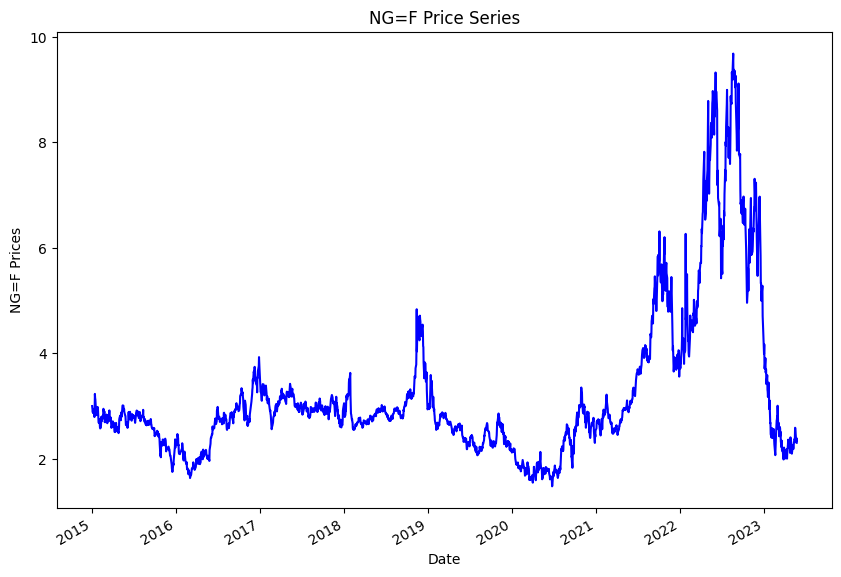

In [6]:
data.Close.plot(figsize=(10,7),color='b')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

c:\Users\belos\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


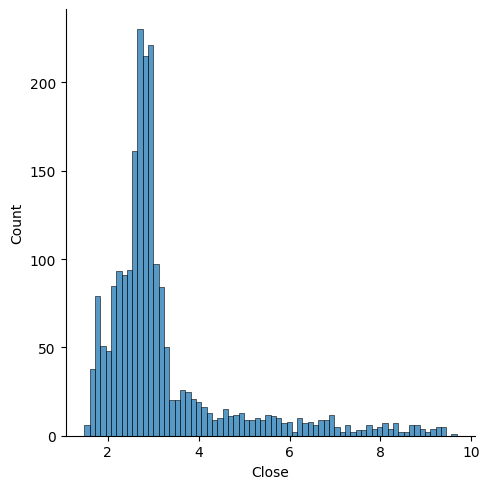

In [7]:
sns.displot(data["Close"])

c:\Users\belos\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


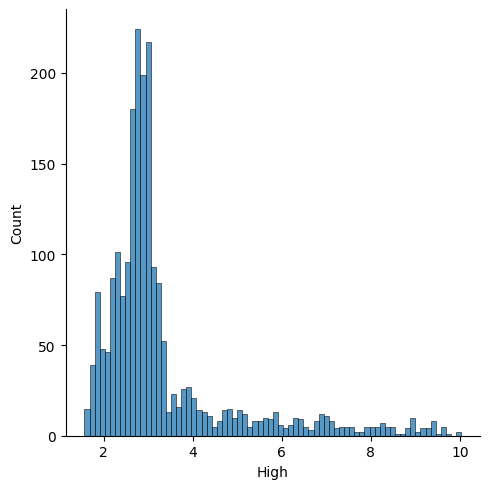

In [8]:
sns.displot(data["High"])

In [10]:
X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1689, 4)
(423, 4)
(1689,)
(423,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2_score:", r2_scors)

calculate_metrics(y_test, pred1)

MSE: 0.002441102177912137
RMSE: 0.04940751135113099
R2_score: 0.998794817758435


In [14]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [15]:
calculate_metrics(y_test, la_p)

MSE: 0.38266860660205454
RMSE: 0.6186021391832189
R2_score: 0.8110749262140042


In [16]:
calculate_metrics(y_test, ri_p)

MSE: 0.002549152040170425
RMSE: 0.05048912794028458
R2_score: 0.998741473094547


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.138 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.055 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.069 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.074 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.100 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.138 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.055 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.069 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.099 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.138 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [30]:
import joblib

model = Ridge()

joblib.dump(model, 'model.pkl')

ridge_from_joblib = joblib.load("model.pkl")